# Diabetes Prediction with Decision Tree

In this notebook we are a given a dataset of symptoms of a variety of patients and we wish to predict the probablity of being diagnosed with Diabetes using Decision Tree.

### Loading Necessary Libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Downloading the dataset:

In [ ]:
file_id = '1HAAdP4rtI2EkJS_867XHMajXxY6z0sRU'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Getting some sense of the dataset:

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### First we separate the features and the labels:

In [ ]:
features = df.drop('Outcome', axis=1)
labels = df['Outcome']
print(f"features: \n{features} \nlabels: \n{labels}")

features: 
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.

### Dividing data into train and test sets:

We separate data by 80%-20% for train and testing. We also define a random seed so we can have the same choice of samples for each class, no matter how many times we run this.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=200)

### Defining the model and train:

The model is implemented by Scikit-Learn. We must choose hyperparameters wisely so the model can reach better accuracy. These parameters will be explained in part B.

In [ ]:
decisiontree = DecisionTreeClassifier(random_state=200, max_depth=6, min_samples_leaf=1)
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=200)

### Testing the results:

In [ ]:
y_pred = decisiontree.predict(X_test)

class_report = classification_report(y_test, y_pred)

print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       106
           1       0.73      0.67      0.70        48

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.81      0.82      0.82       154



The model showed about 82% accuracy and fair results for Precision and Recall. model's precision and recall for 0 class is higher than 1 class. since from the data analysis we know most of the predictions are in 0 class (The mean of the Outcome column is 0.348958 and contains mostly zero) it could be explained by Imbalanced Data.

## Finding the best hyperparameters

Two of the main hyperparameters are **Max_Depth** and **Min_Samples_Leaf**. Max_Depth defines how many layers can Decision tree have at maximum. Min_Samples_Leaf indicates the minimum number of samples required to be at a leaf node. In this part, we test 10 different values for each, starting with Max_Depth:

In [3]:
max_depth_range = np.arange(5,15,1)   # from 5 up to 14 performing grid search

decisiontrees_list = [DecisionTreeClassifier(random_state=200, max_depth=i, min_samples_leaf=1) for i in max_depth_range]
decisiontrees_list

[DecisionTreeClassifier(max_depth=5, random_state=200),
 DecisionTreeClassifier(max_depth=6, random_state=200),
 DecisionTreeClassifier(max_depth=7, random_state=200),
 DecisionTreeClassifier(max_depth=8, random_state=200),
 DecisionTreeClassifier(max_depth=9, random_state=200),
 DecisionTreeClassifier(max_depth=10, random_state=200),
 DecisionTreeClassifier(max_depth=11, random_state=200),
 DecisionTreeClassifier(max_depth=12, random_state=200),
 DecisionTreeClassifier(max_depth=13, random_state=200),
 DecisionTreeClassifier(max_depth=14, random_state=200)]

### Fitting each and testing:

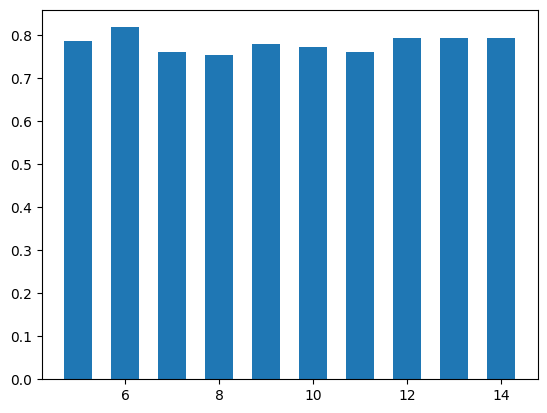


Highest accuracy: 0.8181818181818182


In [ ]:
accuracies = []

for dt in decisiontrees_list:
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.bar(max_depth_range, accuracies, 0.6)
plt.show()
print(f"\nHighest accuracy: {np.array(accuracies).max()}")

As shown above, the highest accuracy is about 82% and belongs to Max_Depth=6 which is a fair depth and avoids overfitting. So the generalization of the model will increase and perform better in testing. Now we test the next hyperparameter:

In [ ]:
min_samples_leaf_range = np.arange(1,21,2)   # from 1 up to 19, 2 steps

decisiontrees_list = [DecisionTreeClassifier(random_state=200, max_depth=6, min_samples_leaf=i) for i in min_samples_leaf_range]
decisiontrees_list

[DecisionTreeClassifier(max_depth=6, random_state=200),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, random_state=200),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, random_state=200),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, random_state=200),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=9, random_state=200),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=11, random_state=200),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=13, random_state=200),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=15, random_state=200),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=17, random_state=200),
 DecisionTreeClassifier(max_depth=6, min_samples_leaf=19, random_state=200)]

### Fitting each and testing:

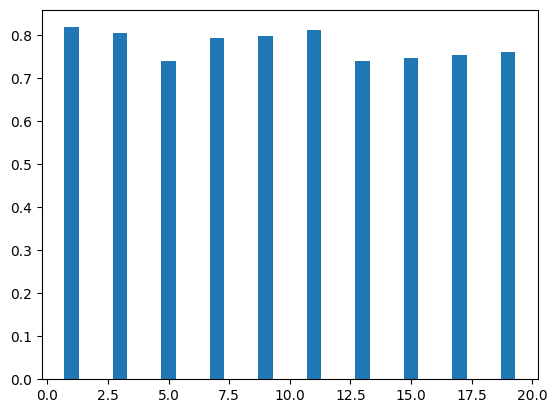


Highest accuracy: 0.8181818181818182


In [ ]:
accuracies = []

for dt in decisiontrees_list:
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.bar(min_samples_leaf_range, accuracies, 0.6)
plt.show()
print(f"\nHighest accuracy: {np.array(accuracies).max()}")

As shown above, the highest accuracy is about 82% and belongs to Min_Samples_Leaf=1. In this case, we probably don't face overfitting and with increasing the values, the model seems to start underfitting the data. for this data, which is a small dataset, Min_Samples_Leaf=1 is a fair value that manages to capture the relations correctly.